<a href="https://colab.research.google.com/github/basselkassem/predict_income_potential/blob/master/model_gmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
data_path = "/content/gdrive/My Drive/Colab Notebooks/predict_income_potential/data/"
model_path = '/content/gdrive/My Drive/Colab Notebooks/predict_income_potential/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Import libs

In [0]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

# Load data

In [23]:
data = pd.read_pickle(data_path + 'data_cont_cat_lb.pkl')
features = list(np.load(data_path + 'features.pkl.npy'))
print('data shape: ', data.shape)
print('feature lenght: ', len(features))

data shape:  (48813, 39)
feature lenght:  31


# Train test split

In [0]:
data = data[features + ['target']]
X, y = data.drop(columns = 'target'), data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Model definition

In [32]:
n_classes = len(np.unique(y_train))
scores = []
for covar_type in ['spherical', 'diag', 'tied', 'full']:
  model_params = {
      'covariance_type': covar_type,
      'init_params': 'random',
      'max_iter': 500, 
  }

  model = GaussianMixture(n_components = n_classes, **model_params)
  model.fit(X_train)
  y_test_hat = model.predict(X_test)
  test_f1 = roc_auc_score(y_test, y_test_hat)
  print('Test roc_auc_score with covariance_type: ', covar_type,': ', test_f1)

Test roc_auc_score with covariance_type:  spherical :  0.622218178202451
Test roc_auc_score with covariance_type:  diag :  0.5318206331142745
Test roc_auc_score with covariance_type:  tied :  0.4224213619288789
Test roc_auc_score with covariance_type:  full :  0.3785435645897236


# Model Training

In [33]:
model_params = {
    'covariance_type': 'spherical',
    'init_params': 'random',
    'max_iter': 500, 
}
model = GaussianMixture(n_components = n_classes, **model_params)
model.fit(X_train)

GaussianMixture(covariance_type='spherical', init_params='random', max_iter=500,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

#Model Evaluation

In [34]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

tr_acc = accuracy_score(y_train, y_train_hat)
tr_f1 = f1_score(y_train, y_train_hat)
tr_auc = roc_auc_score(y_train, y_train_hat)

test_acc = accuracy_score(y_test, y_test_hat)
test_f1 = f1_score(y_test, y_test_hat)
test_auc = roc_auc_score(y_test, y_test_hat)
print('------train-----------')
print('accuracy_score: ', tr_acc)
print('f1_score: ', tr_f1)
print('roc_auc_score: ', tr_auc)
print('------test-------------')
print('accuracy_score: ', test_acc)
print('f1_score: ', test_f1)
print('roc_auc_score: ', test_auc)

------train-----------
accuracy_score:  0.7776639644121864
f1_score:  0.4034550451511582
roc_auc_score:  0.6189193118012558
------test-------------
accuracy_score:  0.7755394700901393
f1_score:  0.4123010906490256
roc_auc_score:  0.622218178202451


[[10204   874]
 [ 2413  1153]]


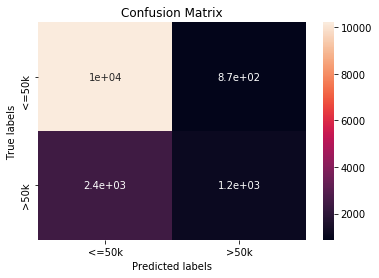

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
labels = [0, 1]
cm = confusion_matrix(y_test, y_test_hat, labels)
print(cm)
ax=  plt.subplot()
sns.heatmap(cm, annot = True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<=50k', '>50k']); 
ax.yaxis.set_ticklabels(['<=50k', '>50k']);

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     11078
           1       0.57      0.32      0.41      3566

    accuracy                           0.78     14644
   macro avg       0.69      0.62      0.64     14644
weighted avg       0.75      0.78      0.75     14644



# Model saving

In [37]:
from joblib import dump
dump(model, model_path + 'model_gmm.joblib') 

['/content/gdrive/My Drive/Colab Notebooks/predict_income_potential/models/model_gmm.joblib']